In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

location = 'pima.csv'

# load dataset
pima = pd.read_csv(location)

# pima.columns = col_names

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
#split dataset in features and target variable
feature_cols = pima.columns.to_list()[:8]#['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = pima[feature_cols].values # Features
y = pima['Outcome'].values      # Target variable

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import tree

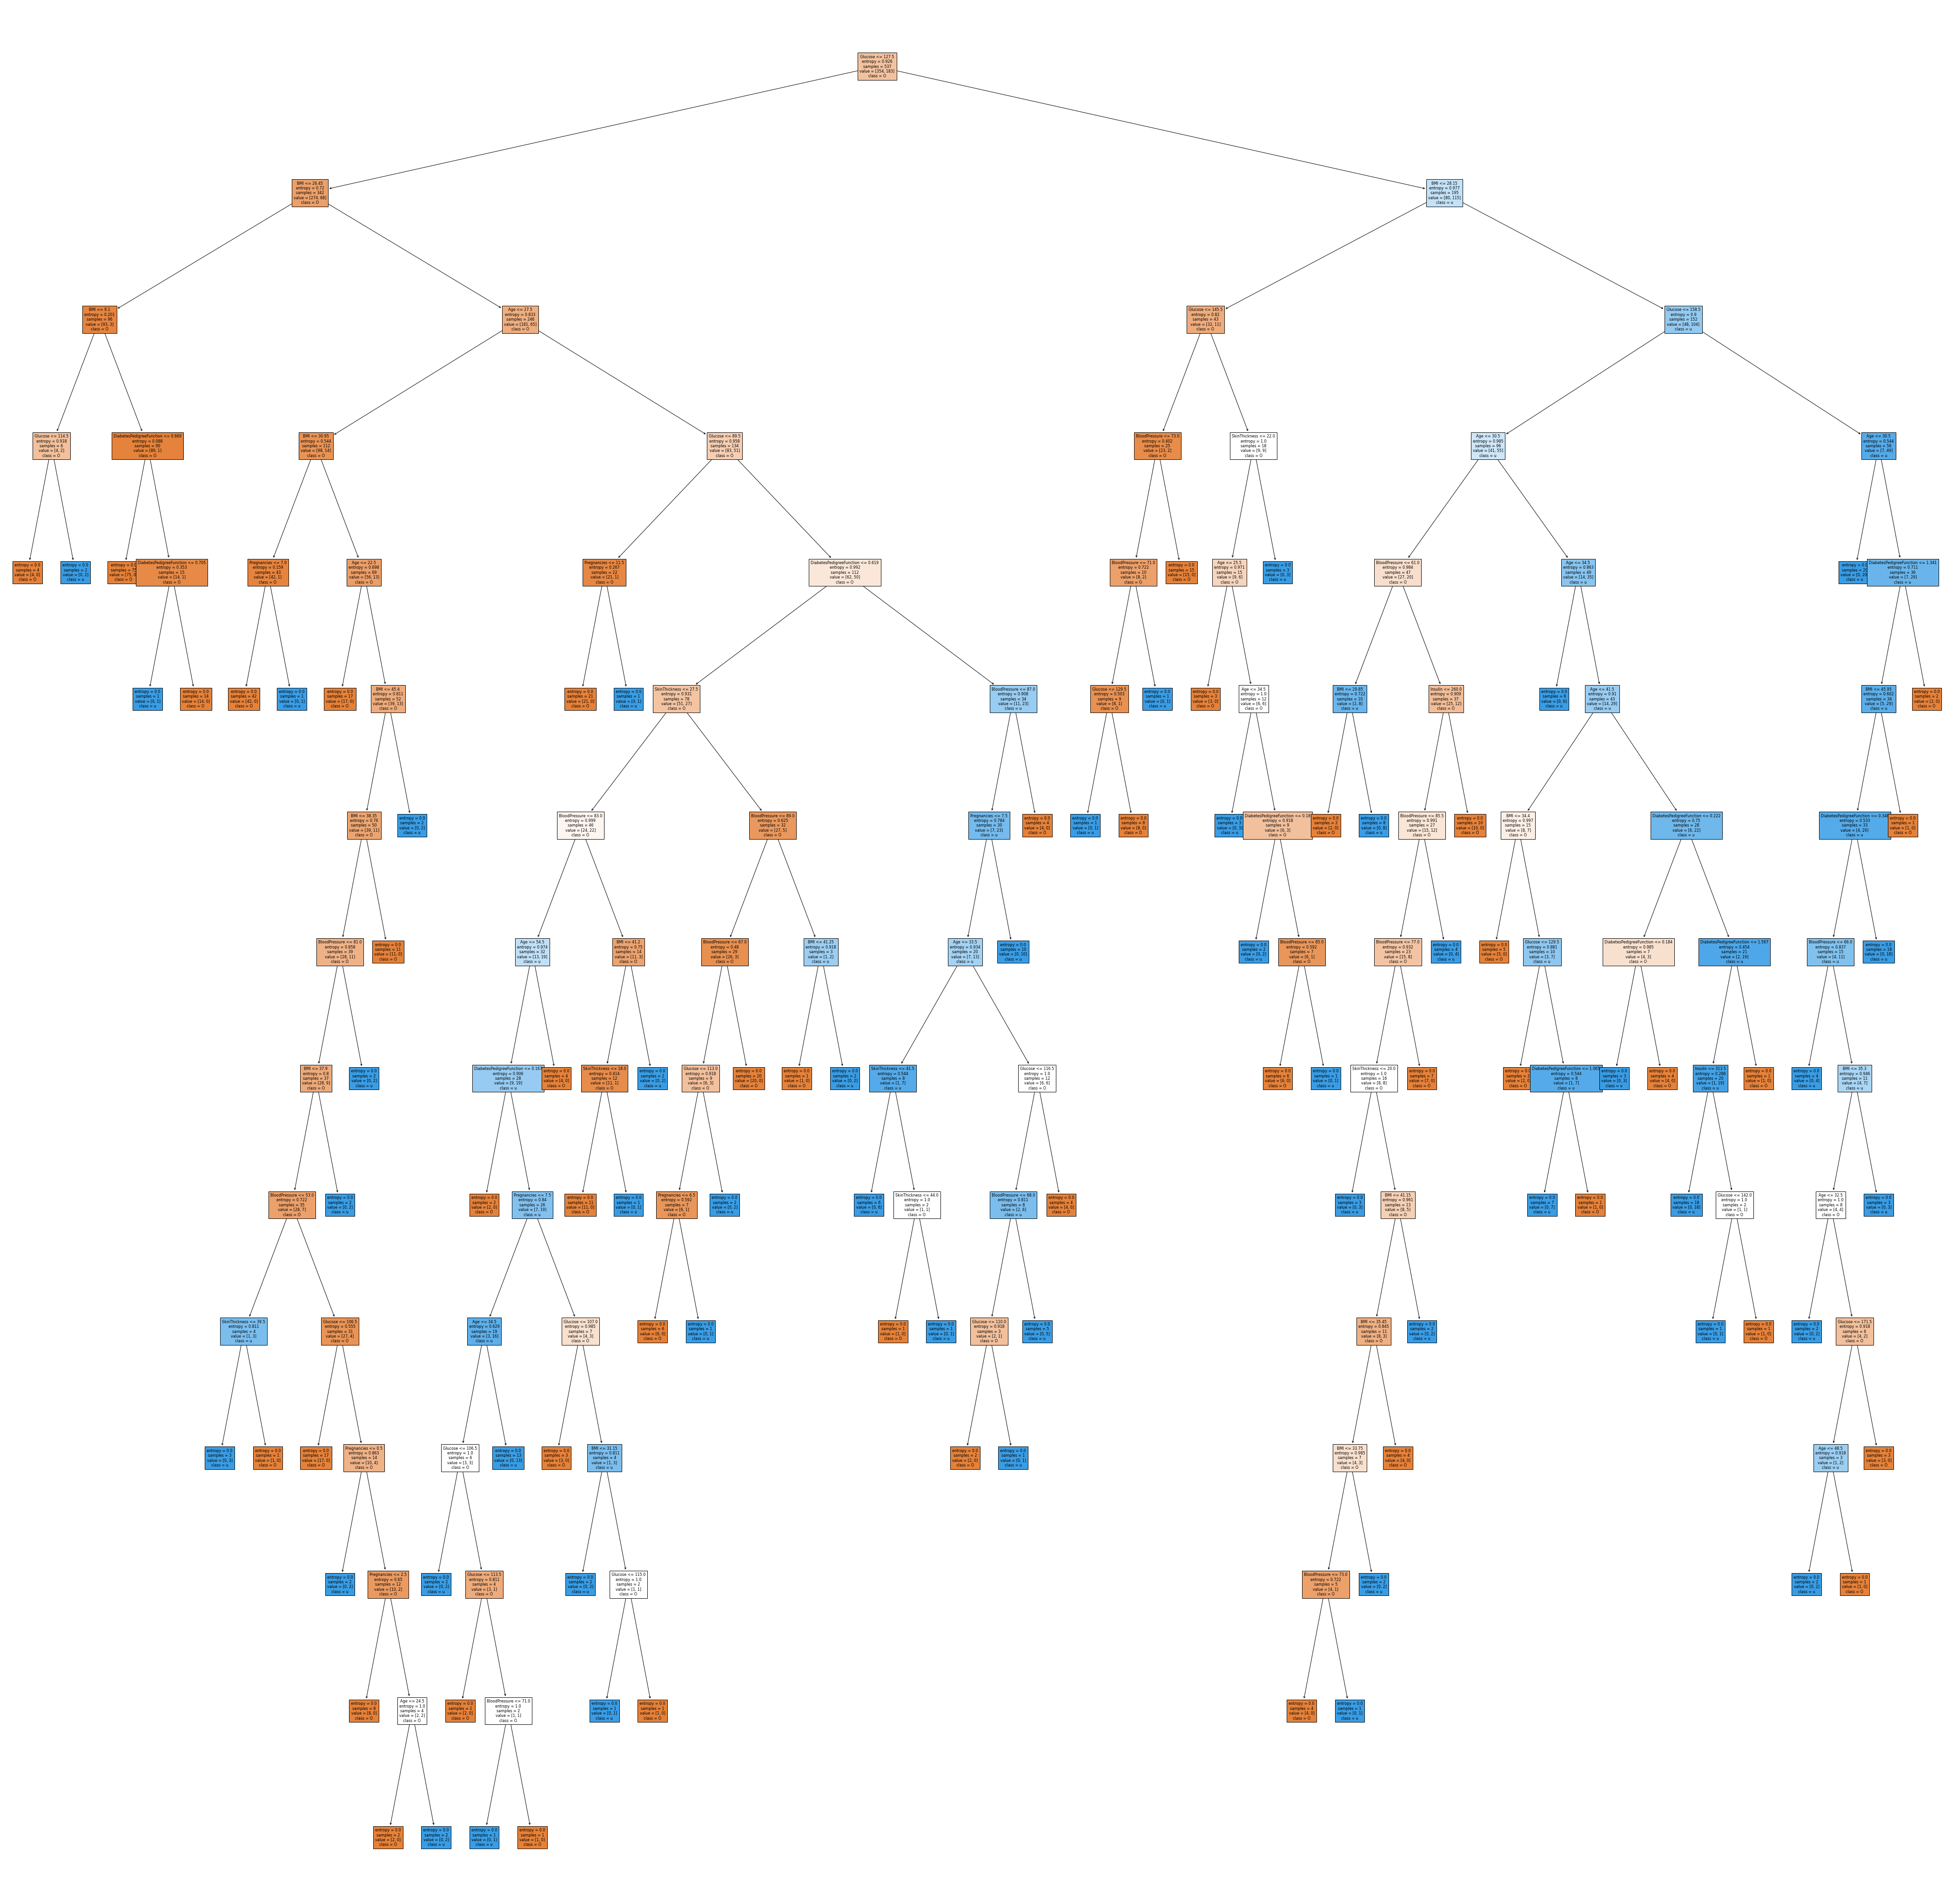

In [30]:
# dot_data = export_graphviz(clf, 
#                            out_file=None, 
#                            feature_names=X.columns,  
#                            class_names=str(y.unique()),  
#                            filled=True, 
#                            rounded=True,  
#                            special_characters=True)  

# graph = graphviz.Source(dot_data)  

# #graph.render("C:\\Users\\Admin\\Desktop\\pima") 
# graph 

fig = plt.figure(figsize=(75,75))
tree.plot_tree(clf,filled=True,fontsize=8, feature_names=feature_cols,  class_names=pima.columns.to_list()[8])
fig.show()

# To save and visualize would be a better option

In [31]:
fig.savefig("decistion_tree.png") 

## feature importance

- higher score the better

In [11]:
clf.feature_importances_

array([0.08613363, 0.02255262, 0.22294086, 0.11528958, 0.27496785,
       0.12434504, 0.15377041])

In [12]:
X.columns

Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')

In [13]:
df_feature_importance = pd.DataFrame(data= {'col_name': X.columns, 'feature_importance': clf.feature_importances_})

In [29]:
df_feature_importance.sort_values(['feature_importance'], ascending=False)

,col_name,feature_importance
4,glucose,0.264395
2,bmi,0.188351
5,bp,0.154612
6,pedigree,0.139278
3,age,0.133945
0,pregnant,0.082694
1,insulin,0.036726
